In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df=pd.read_csv('Diwali Sales Data.csv',encoding='unicode_escape')

In [3]:
df.head()

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


# Exploratory Data Analysis

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


In [5]:
df.describe()

,User_ID,Age,Marital_Status,Orders,Amount,Status,unnamed1
count,1.125100e+04,11251.000000,11251.000000,11251.000000,11239.000000,0.0,0.0
mean,1.003004e+06,35.421207,0.420318,2.489290,9453.610858,NaN,NaN
std,1.716125e+03,12.754122,0.493632,1.115047,5222.355869,NaN,NaN
min,1.000001e+06,12.000000,0.000000,1.000000,188.000000,NaN,NaN
25%,1.001492e+06,27.000000,0.000000,1.500000,5443.000000,NaN,NaN
50%,1.003065e+06,33.000000,0.000000,2.000000,8109.000000,NaN,NaN
75%,1.004430e+06,43.000000,1.000000,3.000000,12675.000000,NaN,NaN
max,1.006040e+06,92.000000,1.000000,4.000000,23952.000000,NaN,NaN


In [6]:
df.shape

(11251, 15)

In [7]:
df.size

168765

# Deleting the last two columns with null values i.e. Status and unnamed!

In [8]:
df.drop(columns=['Status','unnamed1'],inplace=True)

# Check for more Null Values

In [9]:
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

# Only Amount columns has 12 null values therefore dropping the rows with null values alltogether.

In [10]:
df.dropna(inplace=True)

# Changing the datatype of Amount to Int from Float

In [11]:
df.Amount=df.Amount.astype(int)

In [12]:
df['Amount'].dtype

dtype('int64')

# Selective Numeric Description of Columns

In [13]:
df[['Amount','Orders']].describe()

,Amount,Orders
count,11239.000000,11239.000000
mean,9453.610553,2.489634
std,5222.355168,1.114967
min,188.000000,1.000000
25%,5443.000000,2.000000
50%,8109.000000,2.000000
75%,12675.000000,3.000000
max,23952.000000,4.000000


# Starting EDA

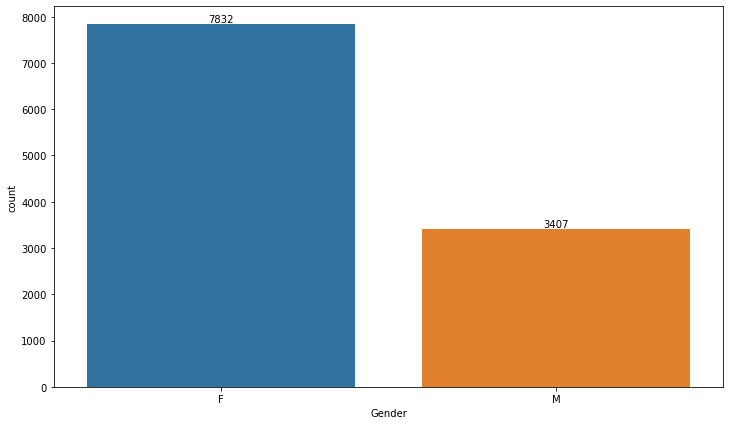

In [14]:
plt.figure(figsize=(12,7))
g1=sns.countplot(x=df.Gender)
for i in g1.containers:
    g1.bar_label(i)

# Visualising the order Amount by gender

In [15]:
sales_gen=df.groupby('Gender')['Amount'].sum().reset_index()

In [16]:
sales_gen

,Gender,Amount
0,F,74335853
1,M,31913276


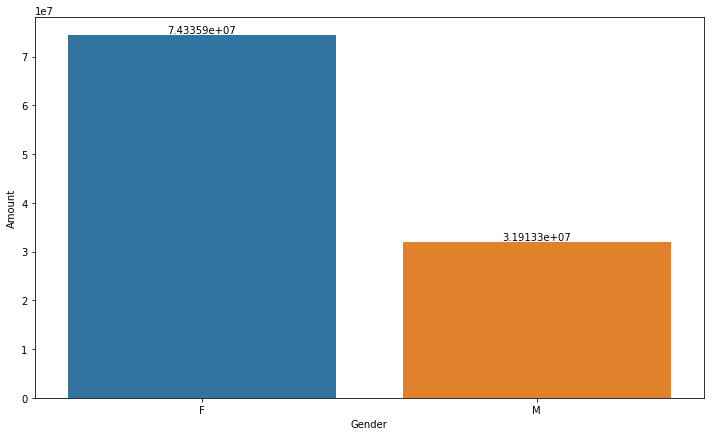

In [17]:
plt.figure(figsize=(12,7))
g2=sns.barplot(x=sales_gen.Gender,y=sales_gen.Amount)
for i in g2.containers:
    g2.bar_label(i)

*From above graphs we can see that most of the buyers are females and even the purchasing power of females are greater than men*

# Visualising the Count by - Age and Gender

<AxesSubplot:xlabel='Age Group', ylabel='count'>

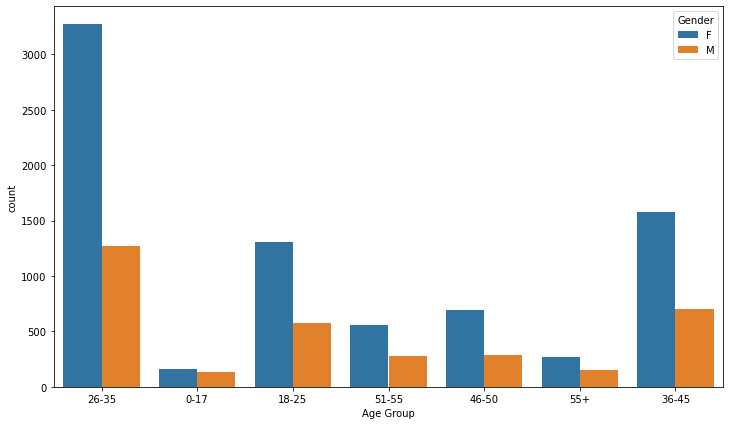

In [18]:
plt.figure(figsize=(12,7))
sns.countplot(x='Age Group',data=df,hue='Gender')

In [19]:
df.columns

Index(['User_ID', 'Cust_name', 'Product_ID', 'Gender', 'Age Group', 'Age',
       'Marital_Status', 'State', 'Zone', 'Occupation', 'Product_Category',
       'Orders', 'Amount'],
      dtype='object')

# Visualising the Amount by - Age

In [20]:
amount_age=df.groupby('Age Group')[['Amount']].sum().sort_values('Amount',ascending=False).reset_index()
amount_age

,Age Group,Amount
0,26-35,42613442
1,36-45,22144994
2,18-25,17240732
3,46-50,9207844
4,51-55,8261477
5,55+,4080987
6,0-17,2699653


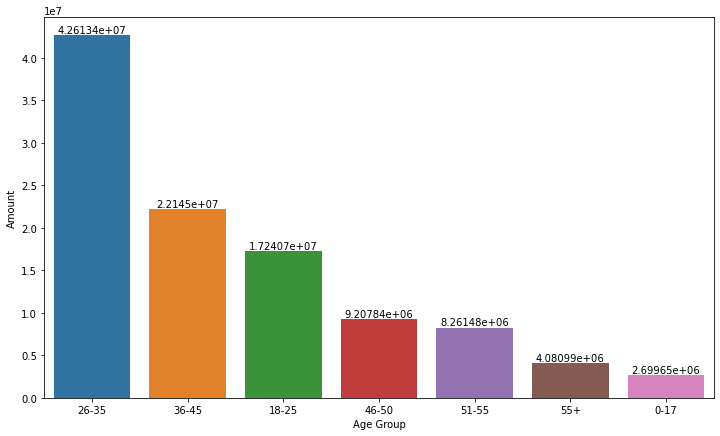

In [21]:
plt.figure(figsize=(12,7))
g3=sns.barplot(x='Age Group',y='Amount',data=amount_age)
for i in g3.containers:
    g3.bar_label(i)

*From above graphs we can see that most of the buyers are of age group between 26-35 yrs female*

# Visualising the Amount by - State

<AxesSubplot:xlabel='State', ylabel='Amount'>

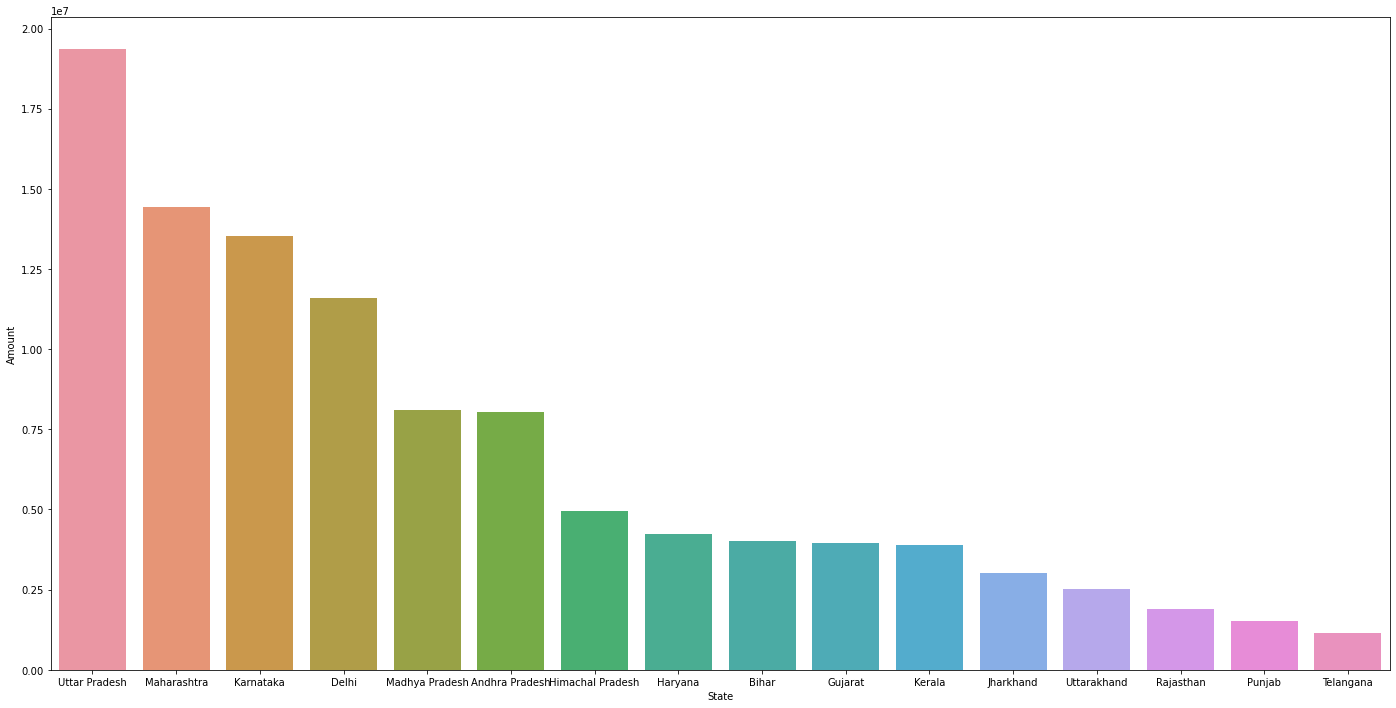

In [22]:
Amount_state=df.groupby('State')['Amount'].sum().reset_index().sort_values('Amount',ascending=False)
plt.figure(figsize=(24,12))
sns.barplot(x='State',y='Amount',data=Amount_state)

# Visualising the Orders by - State

<AxesSubplot:xlabel='State', ylabel='Orders'>

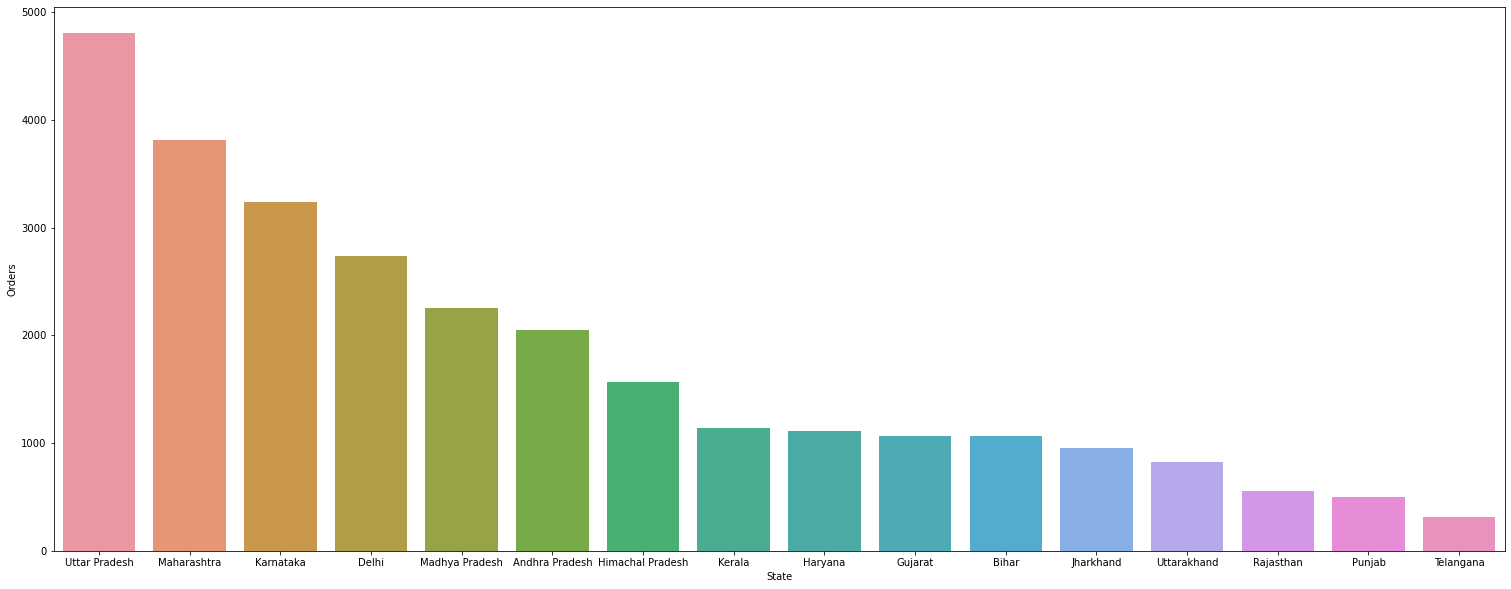

In [23]:
Orders_state=df.groupby('State')['Orders'].sum().reset_index().sort_values('Orders',ascending=False)
plt.figure(figsize=(26,10))
sns.barplot(x='State',y='Orders',data=Orders_state)

*From above graphs we can see that most number of the orders & total sales/amount are from Uttar Pradesh, Maharashtra and Karnataka respectively*

*Also the state of Haryana has lower number of orders than Kerela but higher Amount of sales than Kerela*


# Visualising the Count by - Marital Status

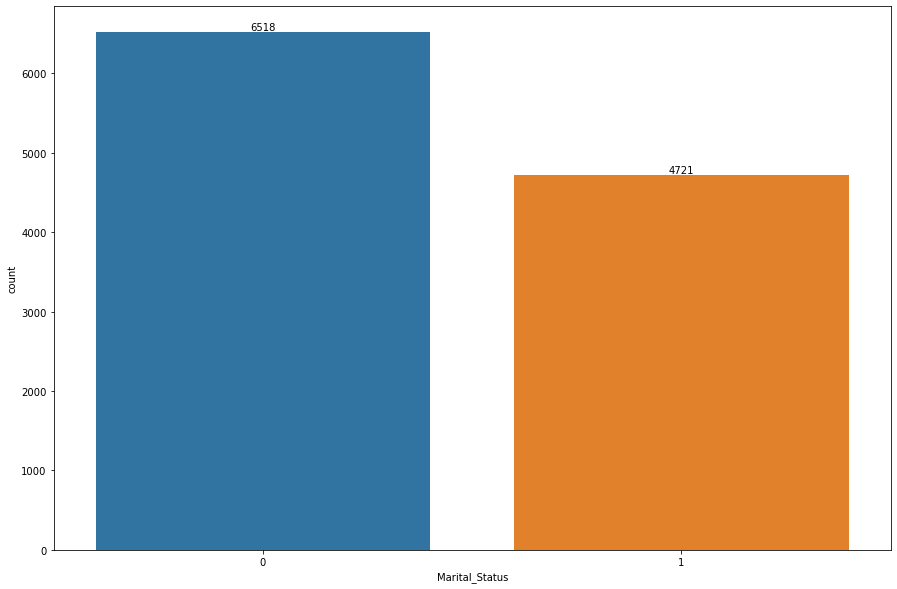

In [24]:
plt.figure(figsize=(15,10))
g5=sns.countplot(x=df.Marital_Status)
for i in g5.containers:
    g5.bar_label(i)


# Visualising the Orders by - Marital Status

In [25]:
orders_marital=df.groupby('Marital_Status')['Orders'].sum().reset_index()
orders_marital

,Marital_Status,Orders
0,0,16249
1,1,11732


<AxesSubplot:xlabel='Marital_Status', ylabel='Orders'>

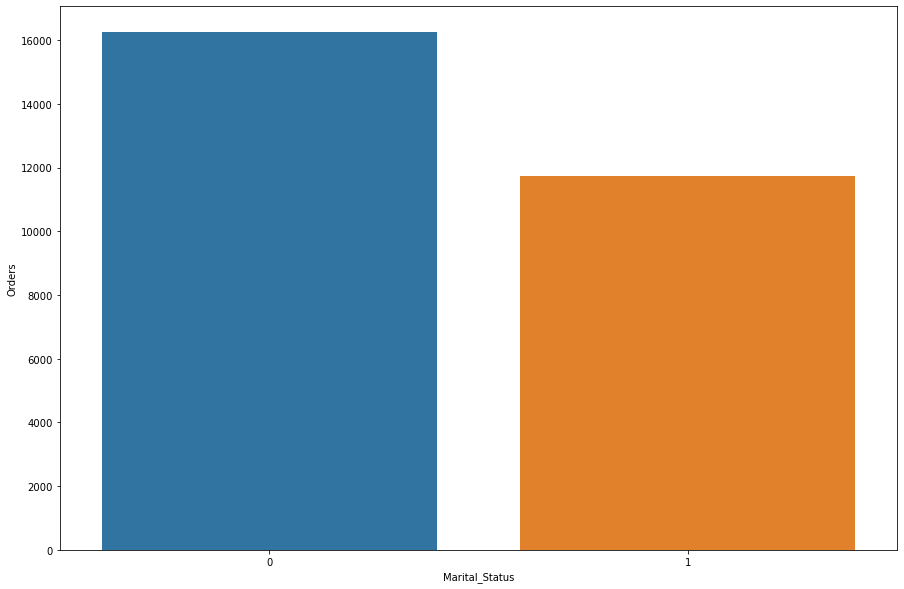

In [26]:
plt.figure(figsize=(15,10))
sns.barplot(x='Marital_Status',y='Orders',data=orders_marital)

# Visualising the Amount by - Marital Status

In [27]:
amount_marital=df.groupby('Marital_Status')['Amount'].sum().reset_index()
amount_marital

,Marital_Status,Amount
0,0,62125384
1,1,44123745


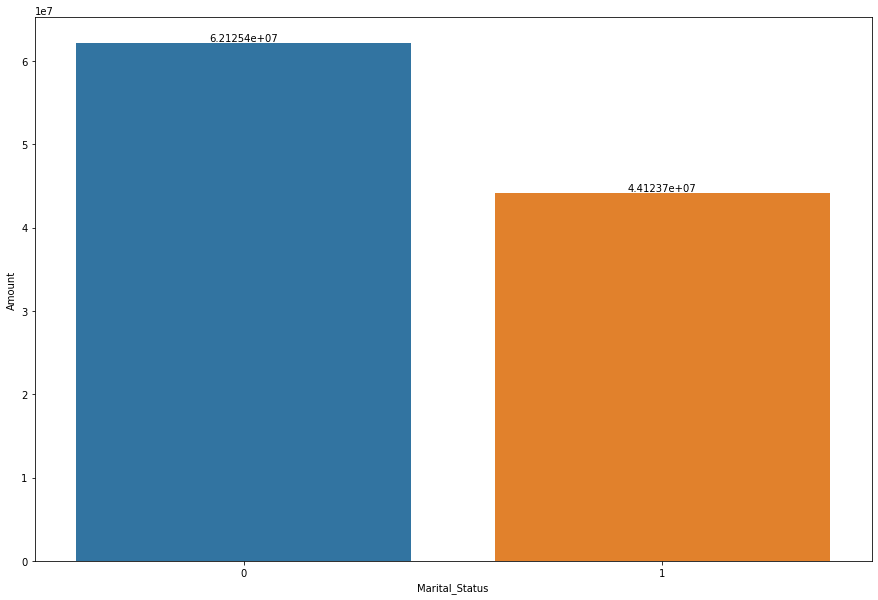

In [33]:
plt.figure(figsize=(15,10))
ax=sns.barplot(x='Marital_Status',y='Amount',data=amount_marital)
for x in ax.containers:
    ax.bar_label(x)

Married People have done more shopping than the singles in terms of amount

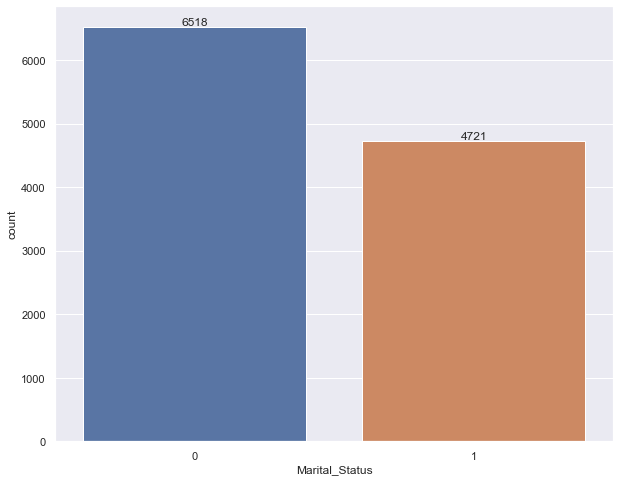

In [38]:
ax=sns.countplot(x=df.Marital_Status)
sns.set(rc={'figure.figsize':(15,8)})
for x in ax.containers:
    ax.bar_label(x)

The number of married buyers is more than of the single buyers

In [45]:
married_grp=df.groupby(['Marital_Status','Gender'])['Amount'].sum().reset_index()
married_grp

,Marital_Status,Gender,Amount
0,0,F,43786646
1,0,M,18338738
2,1,F,30549207
3,1,M,13574538


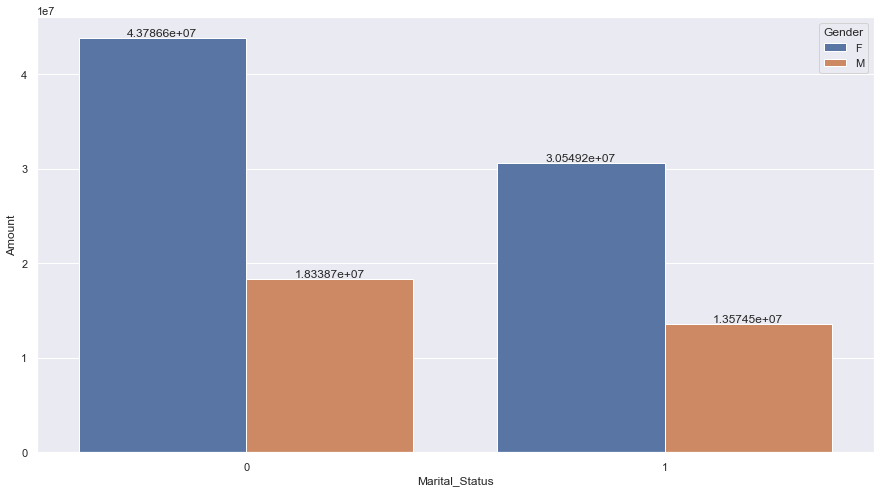

In [47]:
ax=sns.barplot(x='Marital_Status',y='Amount',hue='Gender',data=married_grp)
for x in ax.containers:
    ax.bar_label(x)

Married Females spend more money than marrieed males

# Occupation based– Count

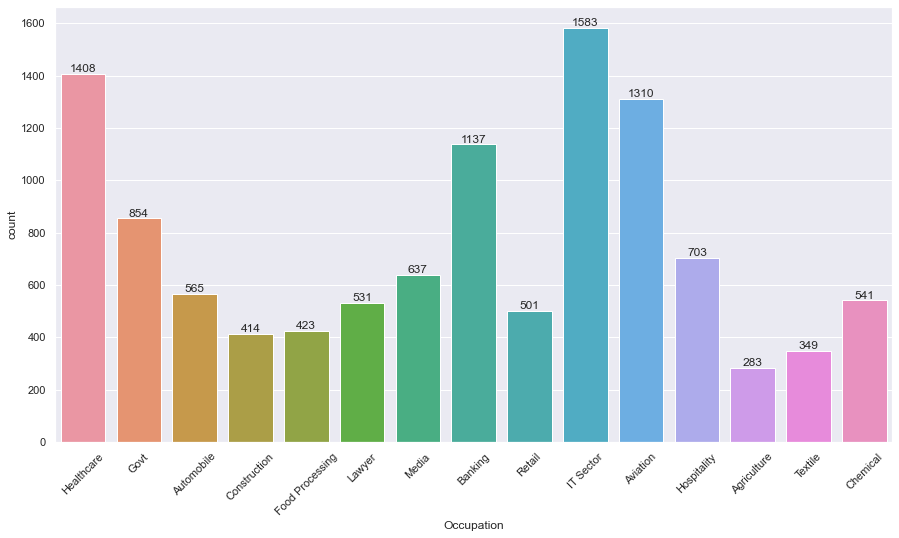

<Figure size 864x1800 with 0 Axes>

In [64]:
ax=sns.countplot(x=df.Occupation)
plt.xticks(rotation=45)
plt.figure(figsize=(12,25))
for x in ax.containers:
    ax.bar_label(x)


IT , HealthCare , Aviation are the top buyers in terms of numbers

# Occupation based– Amount

In [85]:
Occ_Amount_Gen=df.groupby(['Occupation','Gender'])['Amount'].sum().reset_index().sort_values('Amount',ascending=False)
Occ_Amount_Gen.head()

,Occupation,Gender,Amount
20,IT Sector,F,10184835
4,Aviation,F,9007393
16,Healthcare,F,8968231
6,Banking,F,7792295
14,Govt,F,6002907


<AxesSubplot:xlabel='Occupation', ylabel='Amount'>

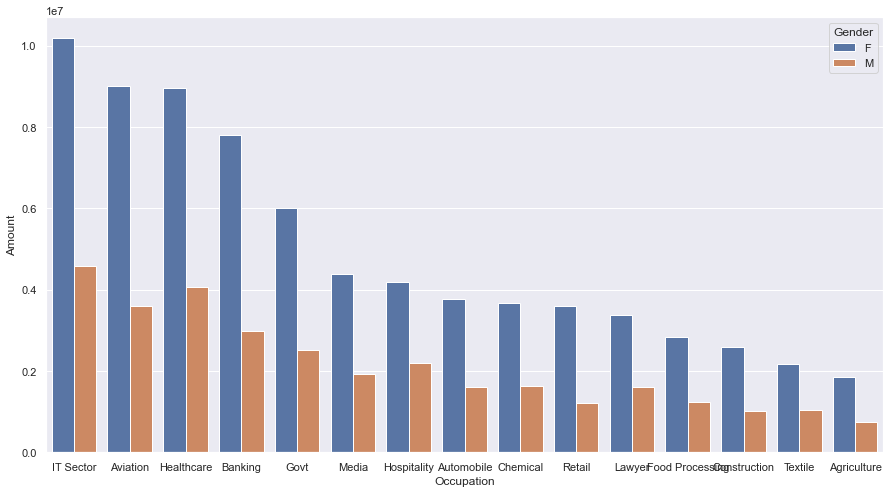

In [86]:
sns.barplot(x='Occupation',y='Amount',data=Occ_Amount_Gen,hue='Gender')

# Product Category - Counts

In [88]:
df.Product_Category.value_counts()

Clothing & Apparel       2655
Food                     2490
Electronics & Gadgets    2087
Footwear & Shoes         1059
Household items           520
Beauty                    422
Games & Toys              386
Sports Products           356
Furniture                 352
Pet Care                  212
Office                    113
Stationery                112
Books                     103
Auto                       97
Decor                      96
Veterinary                 81
Tupperware                 72
Hand & Power Tools         26
Name: Product_Category, dtype: int64

<AxesSubplot:xlabel='Product_Category', ylabel='count'>

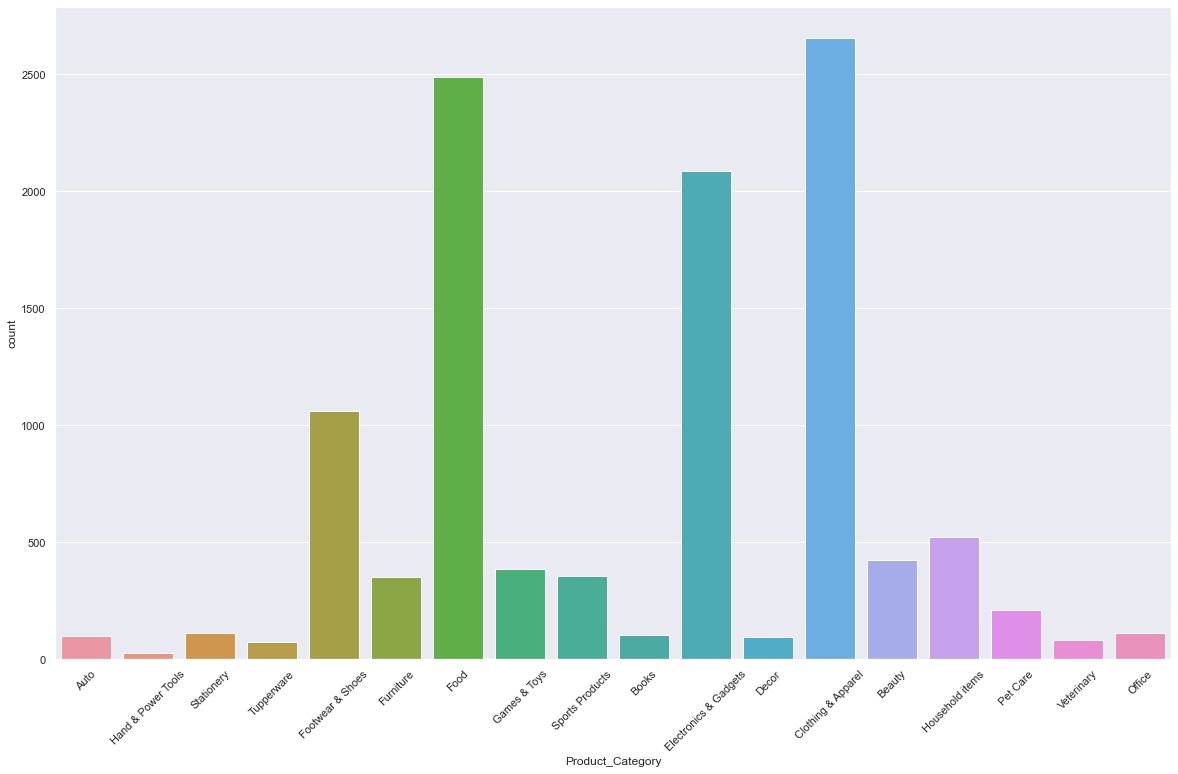

In [99]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
sns.countplot(x=df.Product_Category)


The number of orders are highest in the Clothing Category,then Food , then Electronics

# Product Category-Amount

In [105]:
Category_Amt=df.groupby(['Product_Category','Gender']).Amount.sum().reset_index()
Category_Amt.head()

,Product_Category,Gender,Amount
0,Auto,F,1285791
1,Auto,M,672818
2,Beauty,F,1524257
3,Beauty,M,435227
4,Books,F,404215


<AxesSubplot:xlabel='Product_Category', ylabel='Amount'>

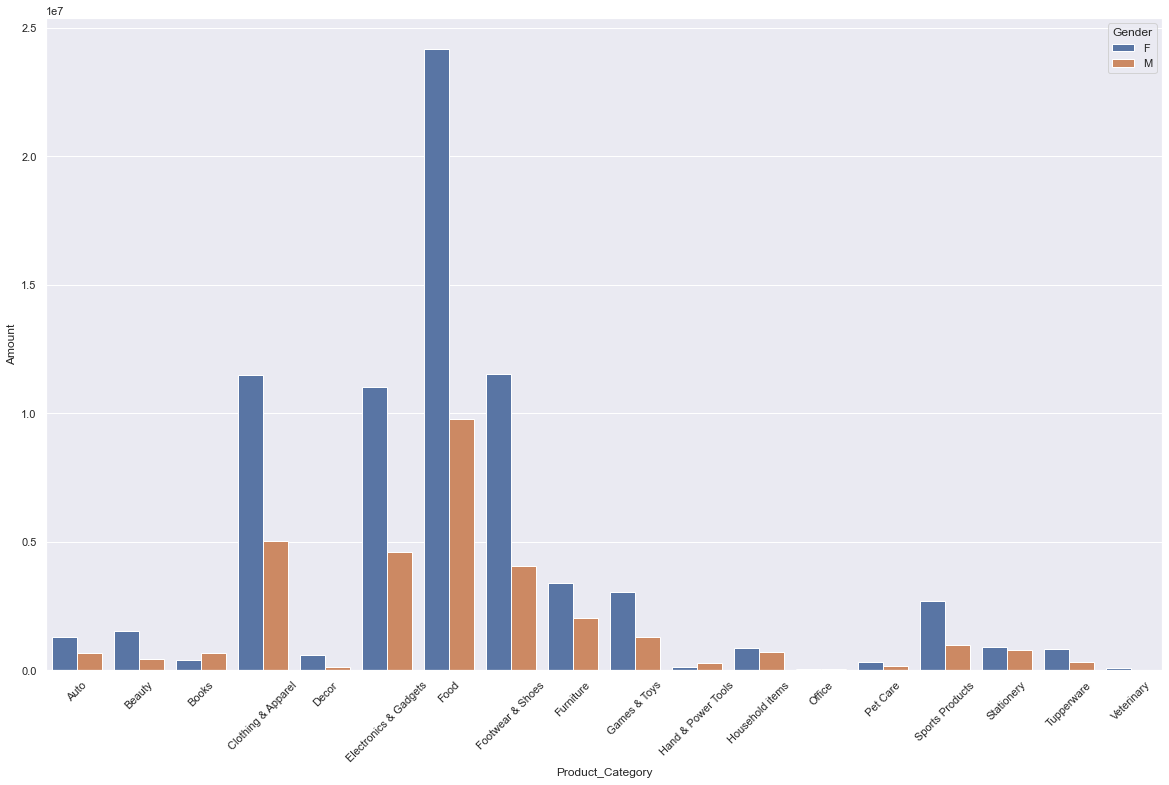

In [107]:
plt.figure(figsize=(20,12))
plt.xticks(rotation=45)
sns.barplot(x='Product_Category',y='Amount',data=Category_Amt,hue='Gender')


But the highest amount of money has been spent on Food and by the females 
which is considerably wayyy higher than the other two highest categories